# Problem Set 1
## PPOL 566

For this assignment, you must submit a completed version of this notebook on Canvas no later than **11:59 PM on Wednesday, September 7**. The filename must end with your Georgetown NetID.

**Written responses** must be written in Markdown within the notebook. For full credit, responses must be written in complete sentences with proper spelling and grammar. Any references included must be properly cited. Failure to properly cite sources will result in a zero on the assignment.

**Code** must run without warnings or errors. Scripts that produce errors will receive zero points for those sections. For full credit, code must be free of semantic errors, be written with liberal comments, include meaningful variable names, and use control structures to minimize repetition (three or more instances of nearly identical statements. NOTE: There is an empty cell after each problem. This does not mean that all code for a given section must be placed in one cell. You may use as many cells as you would like for each section.

## Part 1

### 1.1) Discuss two ways that domain expertise can be applied to unsupervised learning methods.

### 1.2) Describe one scenario in which you *would* use principal components analysis and describe another scenario in which you *would not* use principal components analysis.

Principal Component Analysis or PCA is an effective tool for dimensionality reduction 

### 1.3) Define standardization and discuss its usage with principal components analysis and clustering.  Must data always be standardized?

<font face = "Arial" size = 3>
Standardization is a preprocessing step that transforms data to a single scale. After tranformation, all the data points are centered around a mean value of 0 and a standard deviation of 1. It is a very useful tool when dealing with features that have different scales or when the variables have dramatically different variances(Lever, 2017) as we need the analysis to be scale agnostic otherwise the variance captured in the data will due to larger magnitudes and not actual variance. In Principal Component Analysis(PCA)we try to determine the features that capture the maximum variance, so not standardizing the data might lead to erroneous results.<br>
Data doen't always need to standardized. This is especially true when the feautures in question have the same scale. In those instances, it is beneficial to capture the variances using the original dataset. 
</font>

## Part 2
The **data** file for this assignment is called **pset1_data.csv** and can be found in the Data folder on Canvas. The dataset includes 876 observations for the following individual personality ratings:
 * Openness to experience
 * Conscientiousness
 * Extraversion
 * Agreeableness
 * Neuroticism
 
Together, these are known as the Big Five personality traits, often abbreviated **OCEAN**.

In [44]:
### Prelimenaries 
### Importing required packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

### Reading in the data 
df_personality = pd.read_csv("pset1_data.csv")

### Exploring the data
print("Dimensions of data frame : ", df_personality.shape)
print("Columns : " ,list(df_personality.columns))
print("Column data types : ", df_personality.dtypes)
print("Head of the data frame : ")
df_personality.head()

Dimensions of data frame :  (876, 5)
Columns :  ['Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore']
Column data types :  Nscore    float64
Escore    float64
Oscore    float64
Ascore    float64
Cscore    float64
dtype: object
Head of the data frame : 


,Nscore,Escore,Oscore,Ascore,Cscore
0,0.31287,-0.57545,-0.58331,-0.91699,-0.00665
1,-0.67825,-0.30033,-1.55521,2.03972,1.63088
2,-1.32828,1.93886,-0.84732,-0.30172,1.63088
3,0.62967,2.57309,-0.97631,0.76096,1.13407
4,-0.79151,0.80523,-0.01928,0.94156,3.46436


### 2.1) Perform a dimensionality reduction using Principal Components Analysis. 

In [45]:
def pca_process(df) :
    """
    Function to perform Principal Component Analysis(PCA) on a given dataframe. 

    Arguments : 
    ~~~~~~~~~~~
    df : Object of class DataFrame that has to go through PCA

    Returns :
    ~~~~~~~~~~~
    pca_dict : Dictionary object with the results from performing PCA 
    
    """
    ### Standardizing the dataset 
    st_scaler = StandardScaler()
    df_columns = list(df.columns)
    n = df.shape[1]
    df_scaled = pd.DataFrame(st_scaler.fit_transform(df), columns = df_columns)
    
    ### Fitting the dataset to PCA 
    pca_model = PCA()
    pca_model.fit(df_scaled)

    ### Getting the loadings matrix 
    Z_matrix = np.transpose(pca_model.components_)
    Z_Columns = [f"Z{i}" for i in range(1, n+1)]
    Z_df = pd.DataFrame(Z_matrix, index = df_columns, columns = Z_Columns)

    ### Getting  the variance proportions 
    var_props = pca_model.explained_variance_ratio_

    pca_dict = {
        "Loadings Table" : Z_df,
        "Variance Proportions" : var_props
    }
    
    return pca_dict

pca_results = pca_process(df_personality)

### 2.2) Display a table of principal component loadings. 

In [46]:
### Matrix Z 
pca_results["Loadings Table"]

,Z1,Z2,Z3,Z4,Z5
Nscore,0.561962,0.040939,0.256371,0.570327,0.539930
Escore,-0.523148,0.381223,-0.306198,-0.034267,0.697176
Oscore,-0.033766,0.860811,0.213478,0.244960,-0.390239
Ascore,-0.387330,-0.119581,0.886913,-0.156674,0.156571
Cscore,-0.509264,-0.312567,-0.091268,0.767464,-0.213591


### 2.3) Provide an interpretation of the loadings for the first two components.

### 2.4) Create a scree plot based on the PCA results.

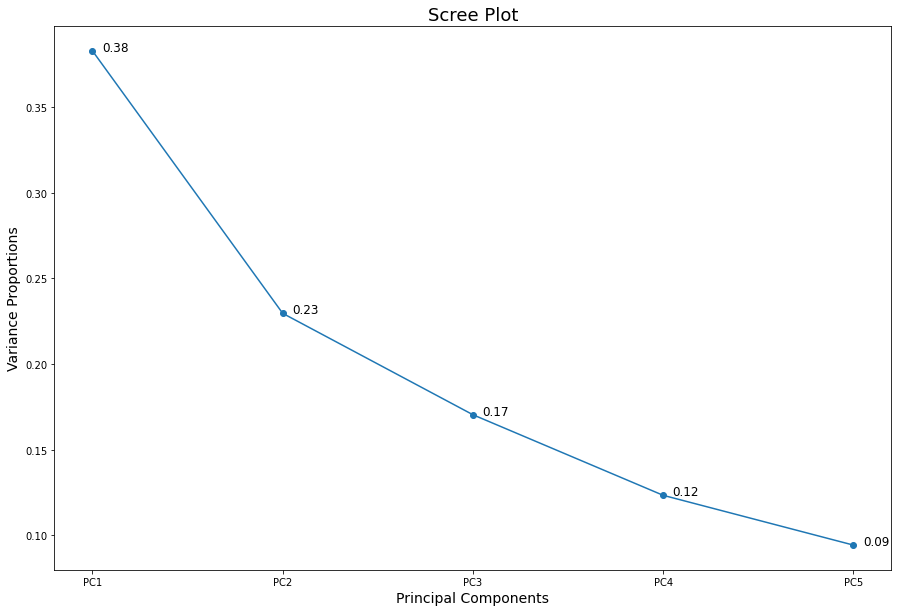

In [75]:
### Generating the scree plot 
y = pca_results["Variance Proportions"]
xticks_labels = [f"PC{i}" for i in range(1, len(y)+1)]

plt.figure(figsize = (15, 10))
plt.plot(y, marker = 'o')
x = np.arange(5)
plt.xticks(x, xticks_labels)
plt.title("Scree Plot", fontsize = 18)
plt.xlabel("Principal Components", fontsize = 14)
plt.ylabel("Variance Proportions", fontsize = 14)
for i in range(len(y)) :
    plt.text(x[i]+0.05, y[i], round(y[i],2), size = 12)

plt.show()

### 2.5) Based on your interpretation of the scree plot, how many principal components would you keep?

<font face = "Arial" size = 3>
Based on the scree plot and the values obtained from the explained_variance_ratio_ attribute of the PCA model, I'd keep the first four principal components as they capture around 90% of the variation in the data. 
</font>